# Run MCP counter on treatment naive samples

Script related to figure 3a, 3b, s3c 

### Aim:
- Estimate cells of the tumour microenvironment using MCP counter

In [1]:
sessionInfo()

R version 3.5.0 (2018-04-23)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.0  IRdisplay_0.6.1 pbdZMQ_0.3-3    tools_3.5.0    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.1     
 [9] uuid_0.1-2      IRkernel_0.8.14 jsonlite_1.6    digest_0.6.18  
[13] repr_0.17       evaluate_0.13  

## Install packages

In [ ]:
#install.packages(c("curl","devtools"))

In [ ]:
#library(devtools)

In [ ]:
#install_github("ebecht/MCPcounter",ref="master", subdir="Source")

## Load packages

In [1]:
library(curl)
library(MCPcounter)

In [2]:
setwd("~/git_repos/HGSOC_TME_Heterogeneity/Scripts/3/")

## Load expression data

In [ ]:
mix <- "../../Data/1/TreatmentNaive_log2exp_loess_norm.txt"

In [3]:
TxNaive_data <- read.table(mix,
                           header=T,
                           sep='\t',
                           row.names='Hugo_Symbol')

In [4]:
head(TxNaive_data)

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,⋯,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
A1BG,4.124711,3.880633,4.864973,4.167882,4.317845,3.679057,4.092837,4.370571,4.252637,4.174694,⋯,3.804537,4.416981,4.169014,4.503313,4.146333,4.078398,4.011369,3.845128,3.600927,4.521857
A2BP1,3.960924,4.033715,3.721251,3.916073,4.338194,3.357396,3.872447,3.803388,3.484735,4.427405,⋯,4.991068,3.799913,4.117883,4.122134,4.221760,3.648326,3.675317,3.546925,3.788279,4.920841
A2M,12.603155,10.859838,12.612923,9.176999,10.548790,11.840776,7.200547,11.835658,11.535547,7.080118,⋯,9.061598,9.189459,8.844728,7.464440,6.726233,9.265911,10.740486,9.735582,10.781599,8.734304
A2ML1,3.945877,4.000621,3.767932,3.789729,3.543204,3.805520,4.336280,4.031757,4.166018,3.673146,⋯,4.231174,3.871651,3.287232,3.721093,3.723801,3.884499,3.694111,3.937682,3.600471,3.402861
A4GALT,3.597277,3.863757,4.051844,4.113169,3.975144,3.991293,5.439960,4.696177,4.171788,4.041633,⋯,4.183089,4.699729,4.019537,3.739865,4.591953,4.997860,4.099630,5.001239,4.714710,4.145119
A4GNT,3.714481,3.593169,3.241352,3.515850,3.364447,3.767865,3.768695,3.163977,3.423377,3.205154,⋯,3.896812,3.915653,3.351422,3.719759,3.641028,3.114521,3.560199,3.539738,3.760903,3.479266


## MCP counter

In [5]:
probesets <- "http://raw.githubusercontent.com/ebecht/MCPcounter/master/Signatures/probesets.txt"
genes <- "http://raw.githubusercontent.com/ebecht/MCPcounter/master/Signatures/genes.txt"

MCP_result = MCPcounter.estimate(TxNaive_data,
                                 featuresType=c("affy133P2_probesets",
                                                "HUGO_symbols",
                                                "ENTREZ_ID")[2],
                                 probesets=read.table(curl(probesets),
                                                      sep="\t",
                                                      stringsAsFactors=FALSE,
                                                      colClasses="character"),
                                 genes=read.table(curl(genes),
                                                  sep="\t",
                                                  stringsAsFactors=FALSE,
                                                  header=TRUE,
                                                  colClasses="character",
                                                  check.names=FALSE))

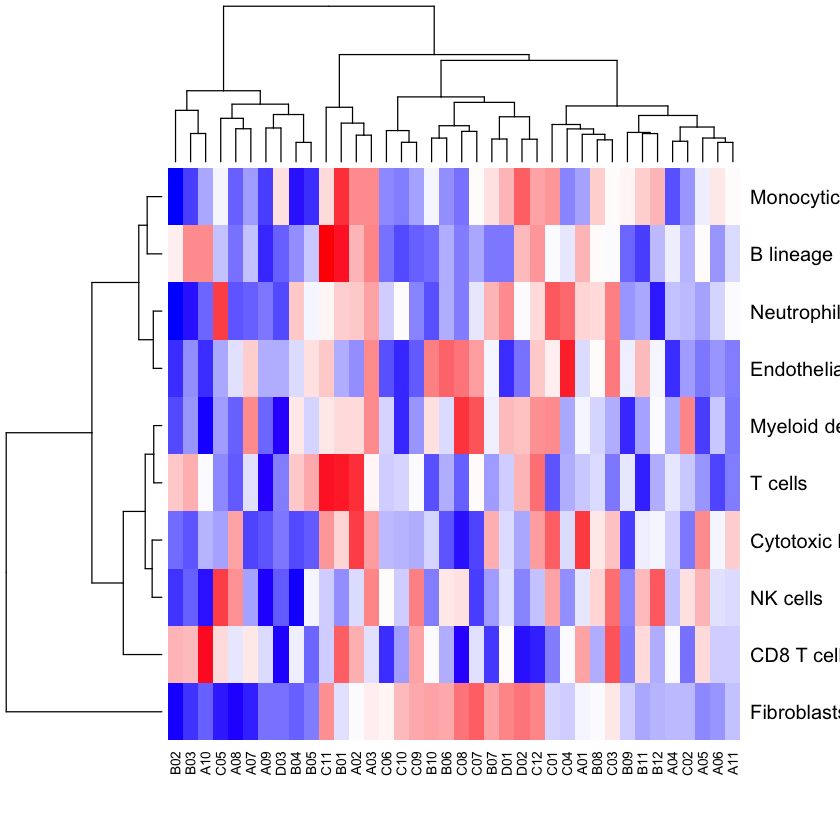

In [6]:
heatmap(as.matrix(MCP_result),
        col=colorRampPalette(c("blue","white","red"))(100))

In [7]:
head(MCP_result)

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,⋯,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
T cells,4.528487,5.207708,4.683623,4.609657,4.414914,4.199644,4.593121,4.254721,4.055357,4.658334,⋯,4.541452,4.662020,4.272964,4.653528,4.557505,5.281122,5.016379,4.551343,4.833545,4.343201
CD8 T cells,3.362125,3.340149,3.170813,3.210788,3.267672,3.141570,3.251608,3.181663,3.164478,3.618108,⋯,2.878650,3.171745,2.830048,3.357170,3.062634,3.138733,2.860706,3.219622,2.840067,2.810478
Cytotoxic lymphocytes,4.839624,4.830298,4.607910,4.295373,4.642049,4.386060,4.000044,4.588757,4.031320,4.245466,⋯,4.265814,4.001872,3.889891,4.239514,4.249442,4.613459,4.607575,4.331030,4.217703,4.114927
NK cells,4.044117,4.034815,4.192092,4.004696,4.145191,4.038369,3.972244,4.185339,3.796969,3.818561,⋯,4.074165,3.861065,4.096786,4.199403,4.016601,4.018716,4.005642,4.036763,3.940997,3.898257
B lineage,6.192896,6.174202,6.383181,5.801224,5.881343,5.424083,5.611007,5.250402,4.903956,6.366628,⋯,5.257515,5.498879,5.306347,5.182485,5.085177,7.219469,6.323789,5.284524,6.140568,5.183236
Monocytic lineage,5.626397,6.374711,6.394080,5.295973,5.899579,6.034623,5.596401,5.368361,5.245905,5.647246,⋯,5.533017,5.981235,5.451456,5.615400,5.495068,6.091733,6.295456,6.217020,6.574160,6.051246


In [8]:
MCP_result <- data.frame("Term"=rownames(MCP_result),
                         MCP_result)

rownames(MCP_result) <- NULL

In [9]:
head(MCP_result)

Term,A01,A02,A03,A04,A05,A06,A07,A08,A09,⋯,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
T cells,4.528487,5.207708,4.683623,4.609657,4.414914,4.199644,4.593121,4.254721,4.055357,⋯,4.541452,4.662020,4.272964,4.653528,4.557505,5.281122,5.016379,4.551343,4.833545,4.343201
CD8 T cells,3.362125,3.340149,3.170813,3.210788,3.267672,3.141570,3.251608,3.181663,3.164478,⋯,2.878650,3.171745,2.830048,3.357170,3.062634,3.138733,2.860706,3.219622,2.840067,2.810478
Cytotoxic lymphocytes,4.839624,4.830298,4.607910,4.295373,4.642049,4.386060,4.000044,4.588757,4.031320,⋯,4.265814,4.001872,3.889891,4.239514,4.249442,4.613459,4.607575,4.331030,4.217703,4.114927
NK cells,4.044117,4.034815,4.192092,4.004696,4.145191,4.038369,3.972244,4.185339,3.796969,⋯,4.074165,3.861065,4.096786,4.199403,4.016601,4.018716,4.005642,4.036763,3.940997,3.898257
B lineage,6.192896,6.174202,6.383181,5.801224,5.881343,5.424083,5.611007,5.250402,4.903956,⋯,5.257515,5.498879,5.306347,5.182485,5.085177,7.219469,6.323789,5.284524,6.140568,5.183236
Monocytic lineage,5.626397,6.374711,6.394080,5.295973,5.899579,6.034623,5.596401,5.368361,5.245905,⋯,5.533017,5.981235,5.451456,5.615400,5.495068,6.091733,6.295456,6.217020,6.574160,6.051246


### Save results

In [11]:
write.table(MCP_result,
            file='../../Data/3/MCPcounterImmuneCells_TreatmentNaive_Results.txt',
            sep='\t',
            row.names=FALSE)

# End script